In [7]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/customers_dataset.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


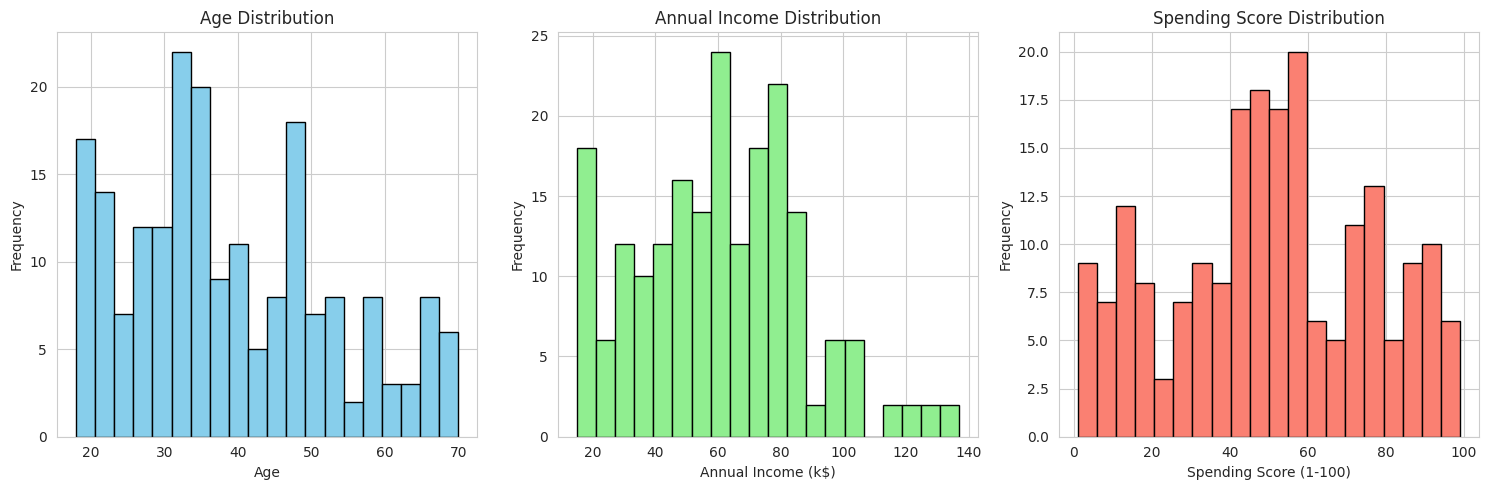

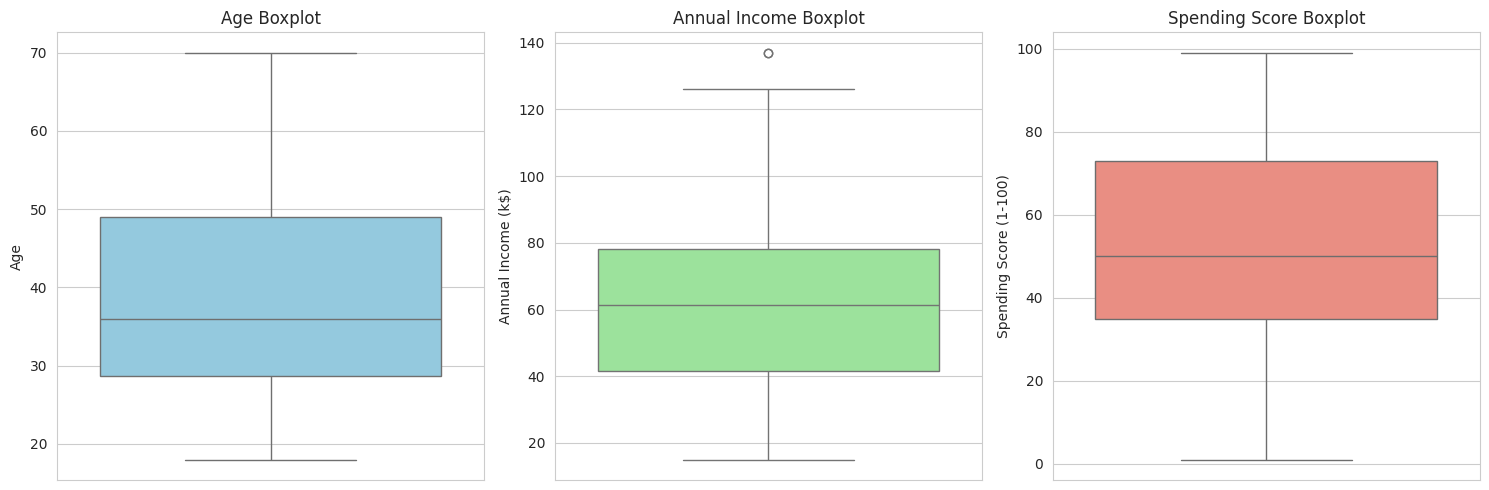

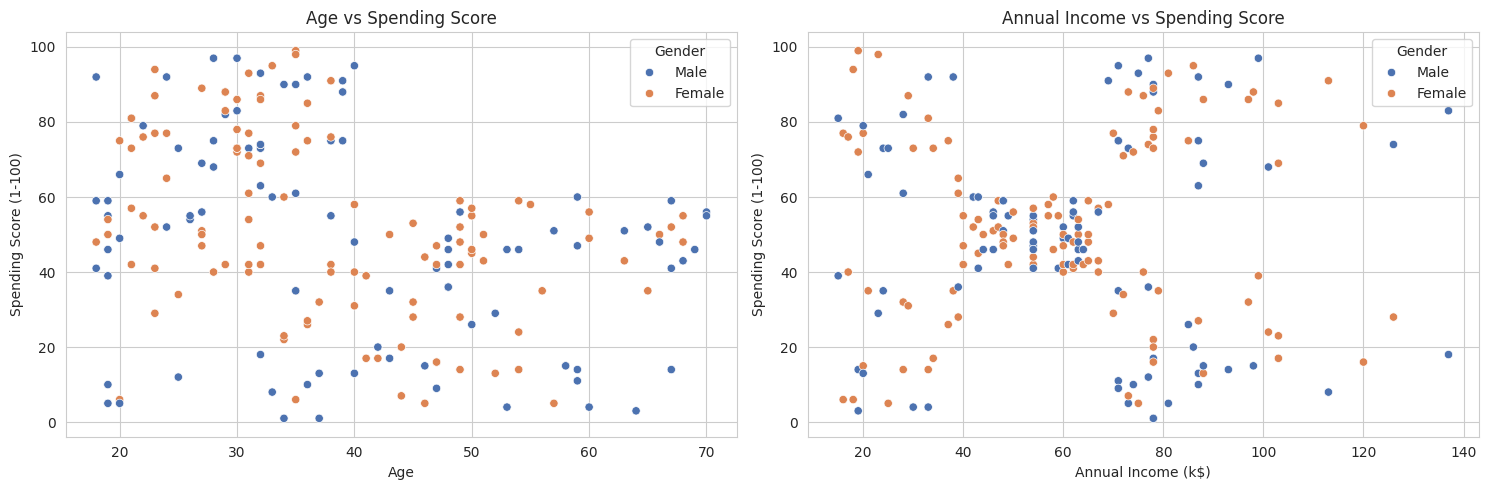

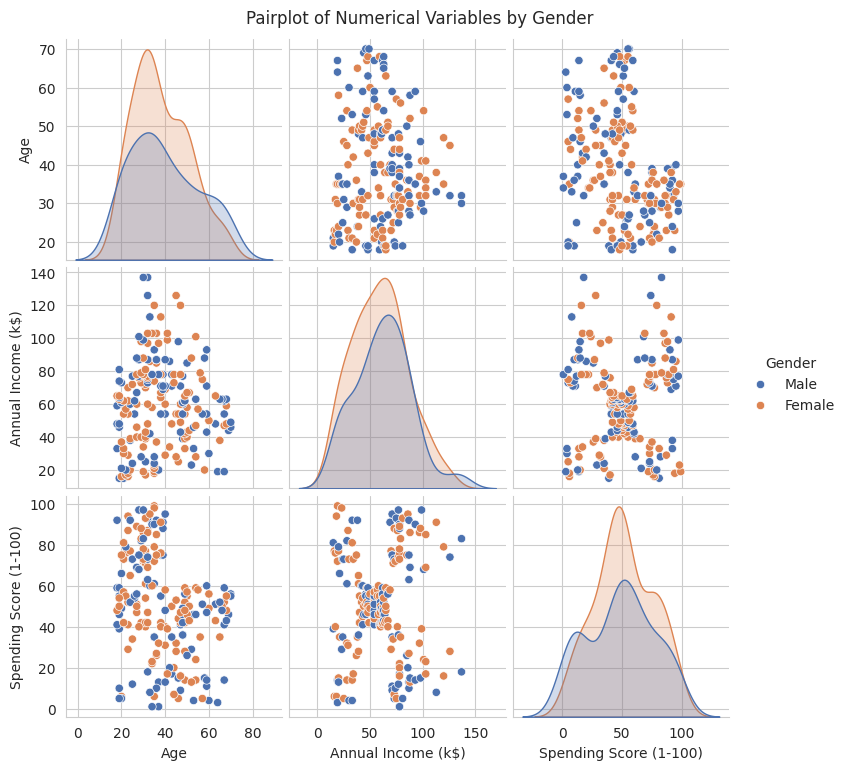

In [22]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns



#Histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()

#BoxPlot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'], color='skyblue')
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual Income (k$)'], color='lightgreen')
plt.title('Annual Income Boxplot')
plt.ylabel('Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Spending Score (1-100)'], color='salmon')
plt.title('Spending Score Boxplot')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()


#Scatter
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data, palette='deep')
plt.title('Age vs Spending Score')
plt.xlabel('Age')


plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data, palette='deep')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()


#pairplot
pair_plot = sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', palette='deep')
pair_plot.fig.suptitle('Pairplot of Numerical Variables by Gender', y=1.02)


Original Skewness:
Age: 0.486
Annual Income (k$): 0.322
Spending Score (1-100): -0.047

Columns with |skewness| > 0.4: ['Age', 'Annual Income (k$)']

Transformation Statistics:

Original:
  mean:
    Age: 38.850
    Annual Income (k$): 60.560
  std:
    Age: 13.969
    Annual Income (k$): 26.265
  skew:
    Age: 0.486
    Annual Income (k$): 0.322

Log:
  mean:
    Age: 3.623
    Annual Income (k$): 4.012
  std:
    Age: 0.357
    Annual Income (k$): 0.495
  skew:
    Age: -0.089
    Annual Income (k$): -0.736

StandardScaler:
  mean:
    Age: -0.000
    Annual Income (k$): -0.000
  std:
    Age: 1.003
    Annual Income (k$): 1.003
  skew:
    Age: 0.486
    Annual Income (k$): 0.322

MinMaxScaler:
  mean:
    Age: 0.401
    Annual Income (k$): 0.373
  std:
    Age: 0.269
    Annual Income (k$): 0.215
  skew:
    Age: 0.486
    Annual Income (k$): 0.322


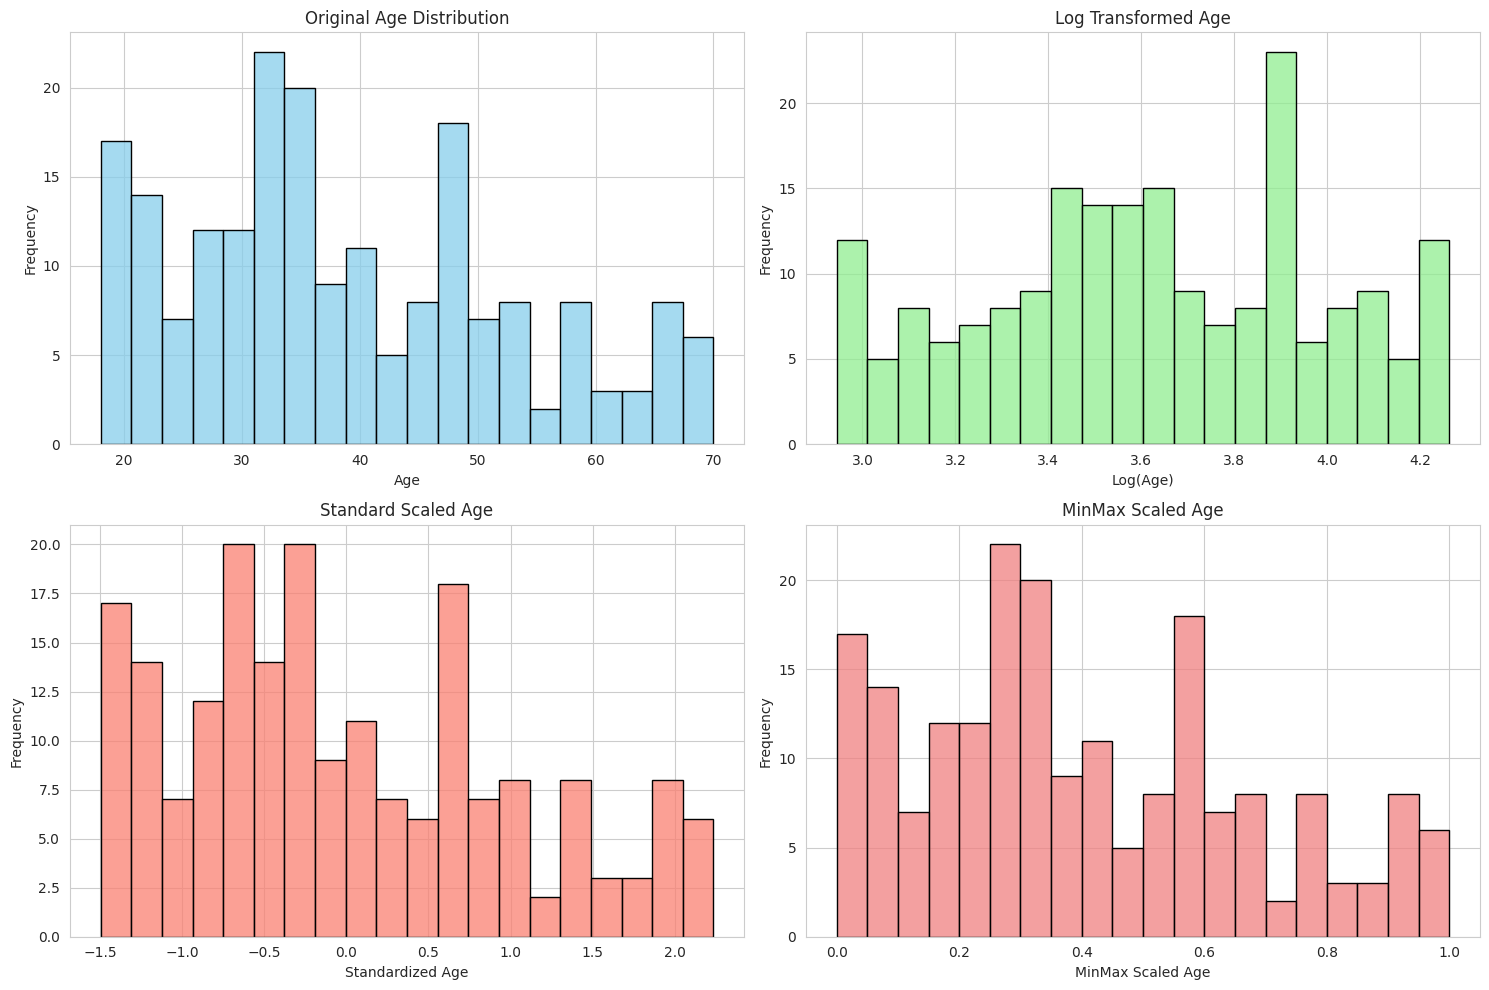

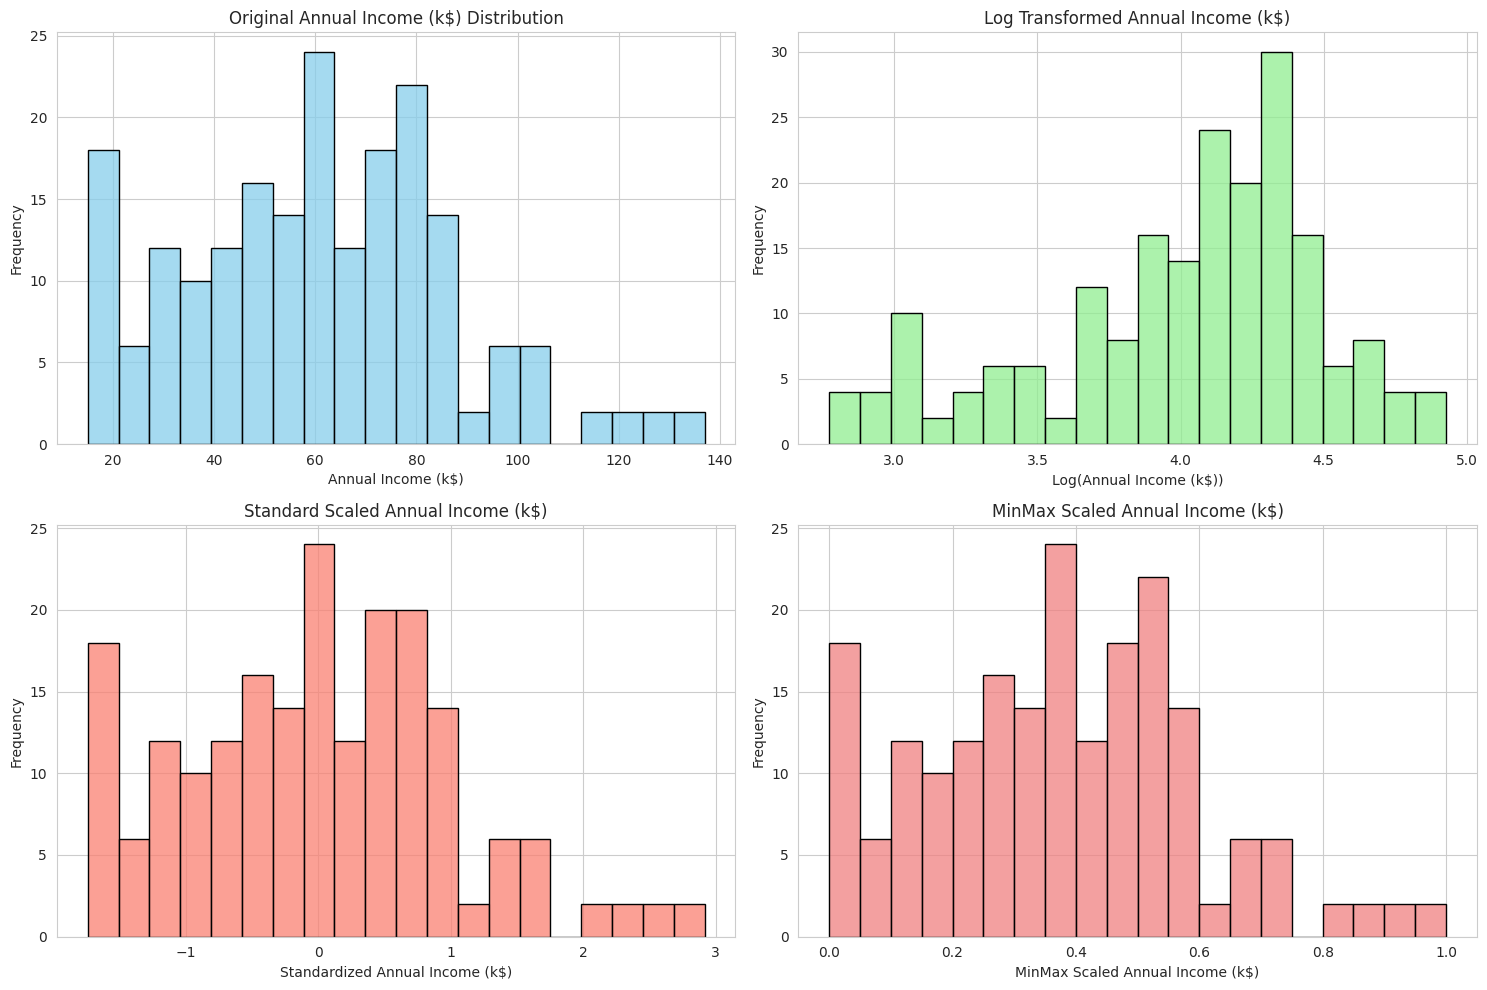

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Calculting Skewness
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


skewness = data[num_cols].skew()
print("Original Skewness:")
for col in num_cols:
    print(f"{col}: {skewness[col]:.3f}")


skewed_cols = skewness[abs(skewness) > 0.3].index.tolist()
print("\nColumns with |skewness| > 0.4:", skewed_cols)

# Storing statistics
stats = {
    'Original': {'mean': {}, 'std': {}, 'skew': {}},
    'Log': {'mean': {}, 'std': {}, 'skew': {}},
    'StandardScaler': {'mean': {}, 'std': {}, 'skew': {}},
    'MinMaxScaler': {'mean': {}, 'std': {}, 'skew': {}}
}

for col in skewed_cols:
    stats['Original']['mean'][col] = data[col].mean()
    stats['Original']['std'][col] = data[col].std()
    stats['Original']['skew'][col] = data[col].skew()

data_transformed = data.copy()

# Log Transform
for col in skewed_cols:
    data_transformed[f'{col}_log'] = np.log1p(data_transformed[col])
    stats['Log']['mean'][col] = data_transformed[f'{col}_log'].mean()
    stats['Log']['std'][col] = data_transformed[f'{col}_log'].std()
    stats['Log']['skew'][col] = data_transformed[f'{col}_log'].skew()

# StandardScaler
scaler = StandardScaler()
for col in skewed_cols:
    data_transformed[f'{col}_std'] = scaler.fit_transform(data_transformed[[col]])
    stats['StandardScaler']['mean'][col] = data_transformed[f'{col}_std'].mean()
    stats['StandardScaler']['std'][col] = data_transformed[f'{col}_std'].std()
    stats['StandardScaler']['skew'][col] = data_transformed[f'{col}_std'].skew()

# MinMaxScaler
minmax_scaler = MinMaxScaler()
for col in skewed_cols:
    data_transformed[f'{col}_minmax'] = minmax_scaler.fit_transform(data_transformed[[col]])
    stats['MinMaxScaler']['mean'][col] = data_transformed[f'{col}_minmax'].mean()
    stats['MinMaxScaler']['std'][col] = data_transformed[f'{col}_minmax'].std()
    stats['MinMaxScaler']['skew'][col] = data_transformed[f'{col}_minmax'].skew()


print("\nTransformation Statistics:")
for transform in stats:
    print(f"\n{transform}:")
    for metric in stats[transform]:
        print(f"  {metric}:")
        for col in skewed_cols:
            print(f"    {col}: {stats[transform][metric][col]:.3f}")

# Plotting histograms
for col in skewed_cols:
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    sns.histplot(data_transformed[f'{col}_log'], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Log Transformed {col}')
    plt.xlabel(f'Log({col})')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    sns.histplot(data_transformed[f'{col}_std'], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Standard Scaled {col}')
    plt.xlabel(f'Standardized {col}')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.histplot(data_transformed[f'{col}_minmax'], bins=20, color='lightcoral', edgecolor='black')
    plt.title(f'MinMax Scaled {col}')
    plt.xlabel(f'MinMax Scaled {col}')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(f'histogram_{col.lower().replace(" ", "_")}.png')

Cluster Centers (Annual Income (k$), Spending Score):
Cluster 1: (87.00, 18.63)
Cluster 2: (86.54, 82.13)
Cluster 3: (44.15, 49.83)


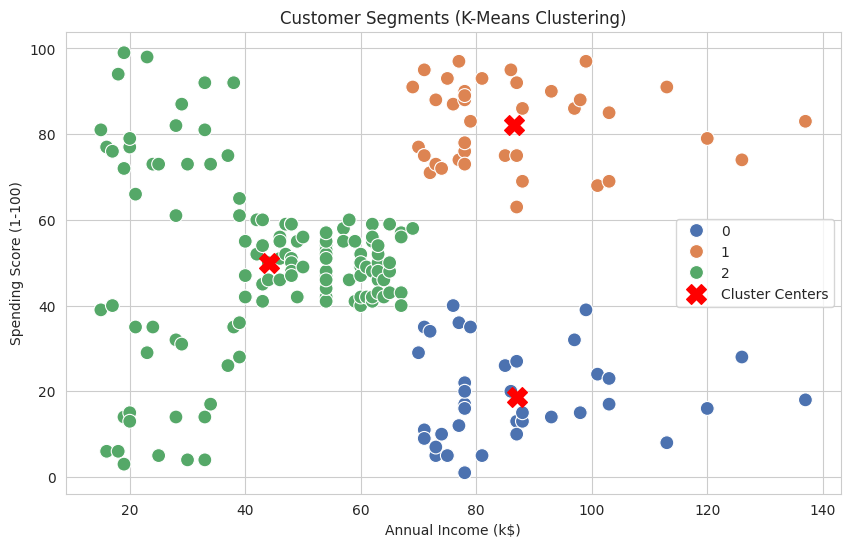

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



# Selecting features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Running K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_



print("Cluster Centers (Annual Income (k$), Spending Score):")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}: ({center[0]:.2f}, {center[1]:.2f})")


# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', data=data, s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.savefig('clusters.png')

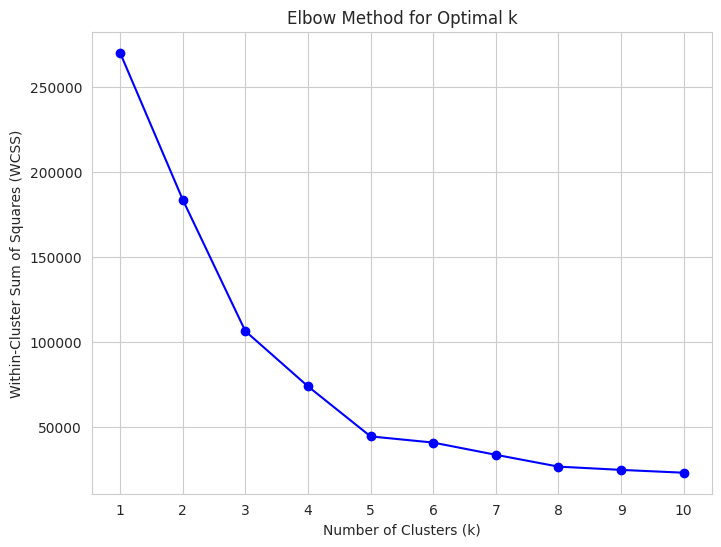

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



# Running K-Means for k = 1 to 10 and storing WCSS in a dictionary
wcss_dict = {}
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_dict[k] = kmeans.inertia_

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(list(wcss_dict.keys()), list(wcss_dict.values()), marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(list(k_range))
plt.grid(True)
plt.savefig('elbow_plot.png')

Cluster Centers (Annual Income (k$), Spending Score):
Cluster 1: (55.30, 49.52)
Cluster 2: (86.54, 82.13)
Cluster 3: (25.73, 79.36)
Cluster 4: (88.20, 17.11)
Cluster 5: (26.30, 20.91)

Mean Values per Cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


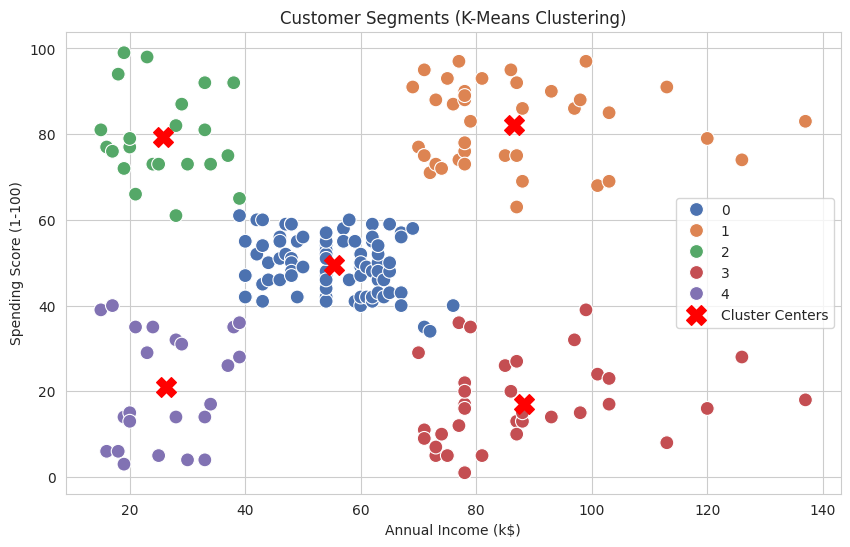

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Running K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


centers = kmeans.cluster_centers_

cluster_stats = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("Cluster Centers (Annual Income (k$), Spending Score):")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}: ({center[0]:.2f}, {center[1]:.2f})")

print("\nMean Values per Cluster:")
print(cluster_stats)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', data=data, s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


Transformation Statistics:

Original:
  mean:
    Age: 38.850
    Annual Income (k$): 60.560
  std:
    Age: 13.969
    Annual Income (k$): 26.265
  skew:
    Age: 0.486
    Annual Income (k$): 0.322

Log:
  mean:
    Age: 3.623
    Annual Income (k$): 4.012
  std:
    Age: 0.357
    Annual Income (k$): 0.495
  skew:
    Age: -0.089
    Annual Income (k$): -0.736

SquareRoot:
  mean:
    Age: 6.133
    Annual Income (k$): 7.581
  std:
    Age: 1.114
    Annual Income (k$): 1.761
  skew:
    Age: 0.195
    Annual Income (k$): -0.230

BoxCox:
  mean:
    Age: 4.763
    Annual Income (k$): 20.126
  std:
    Age: 0.624
    Annual Income (k$): 6.395
  skew:
    Age: -0.016
    Annual Income (k$): -0.066


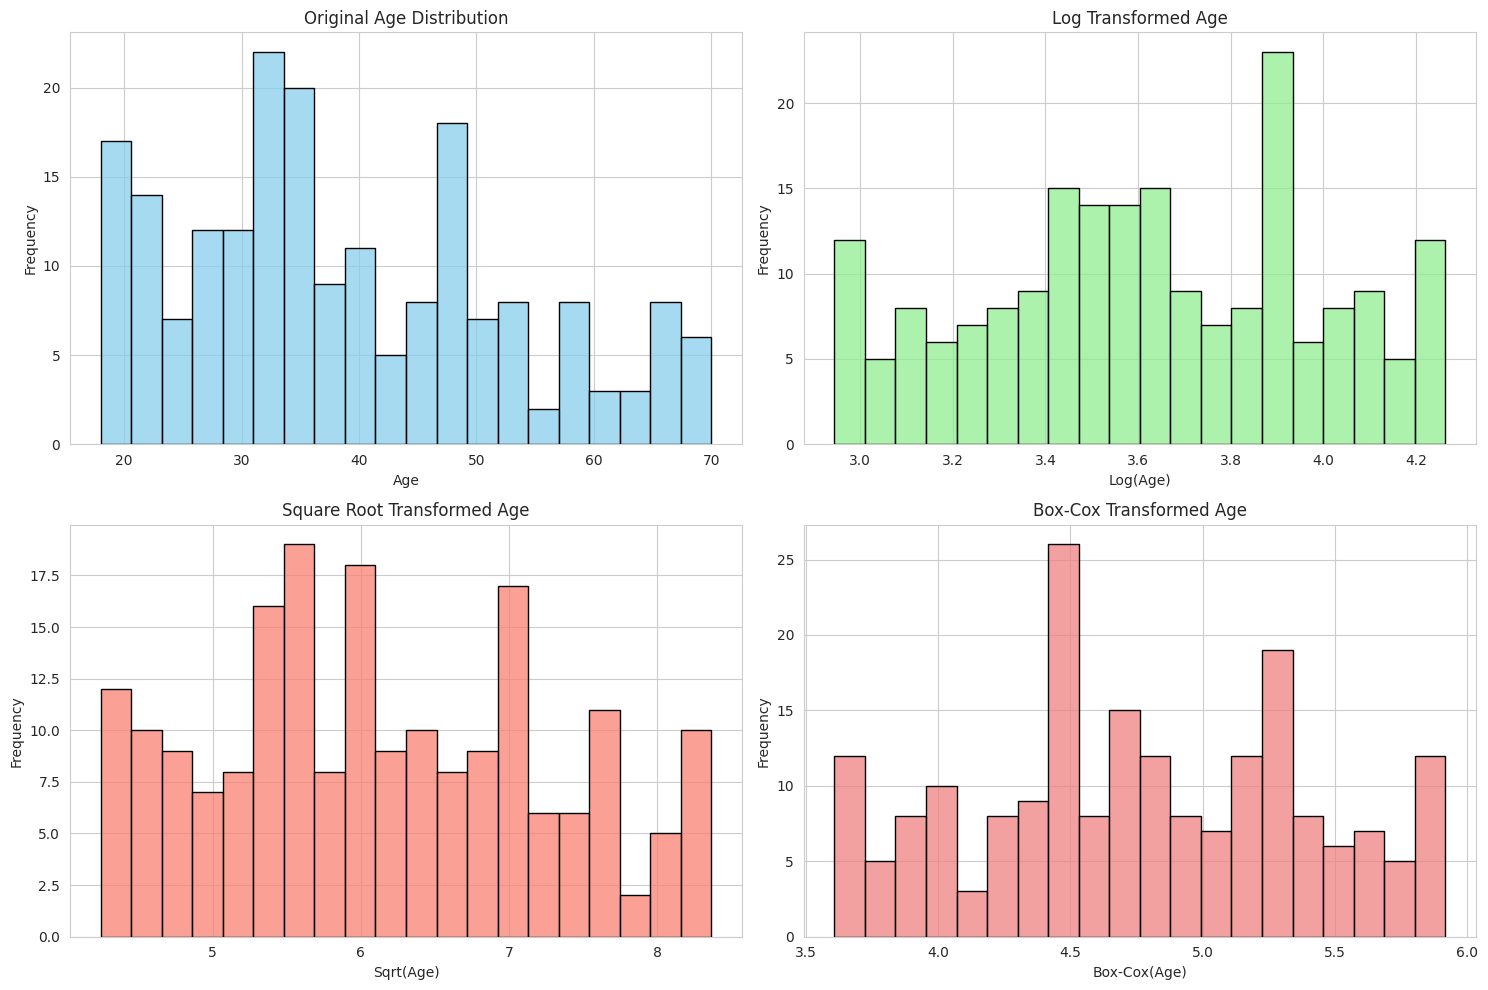

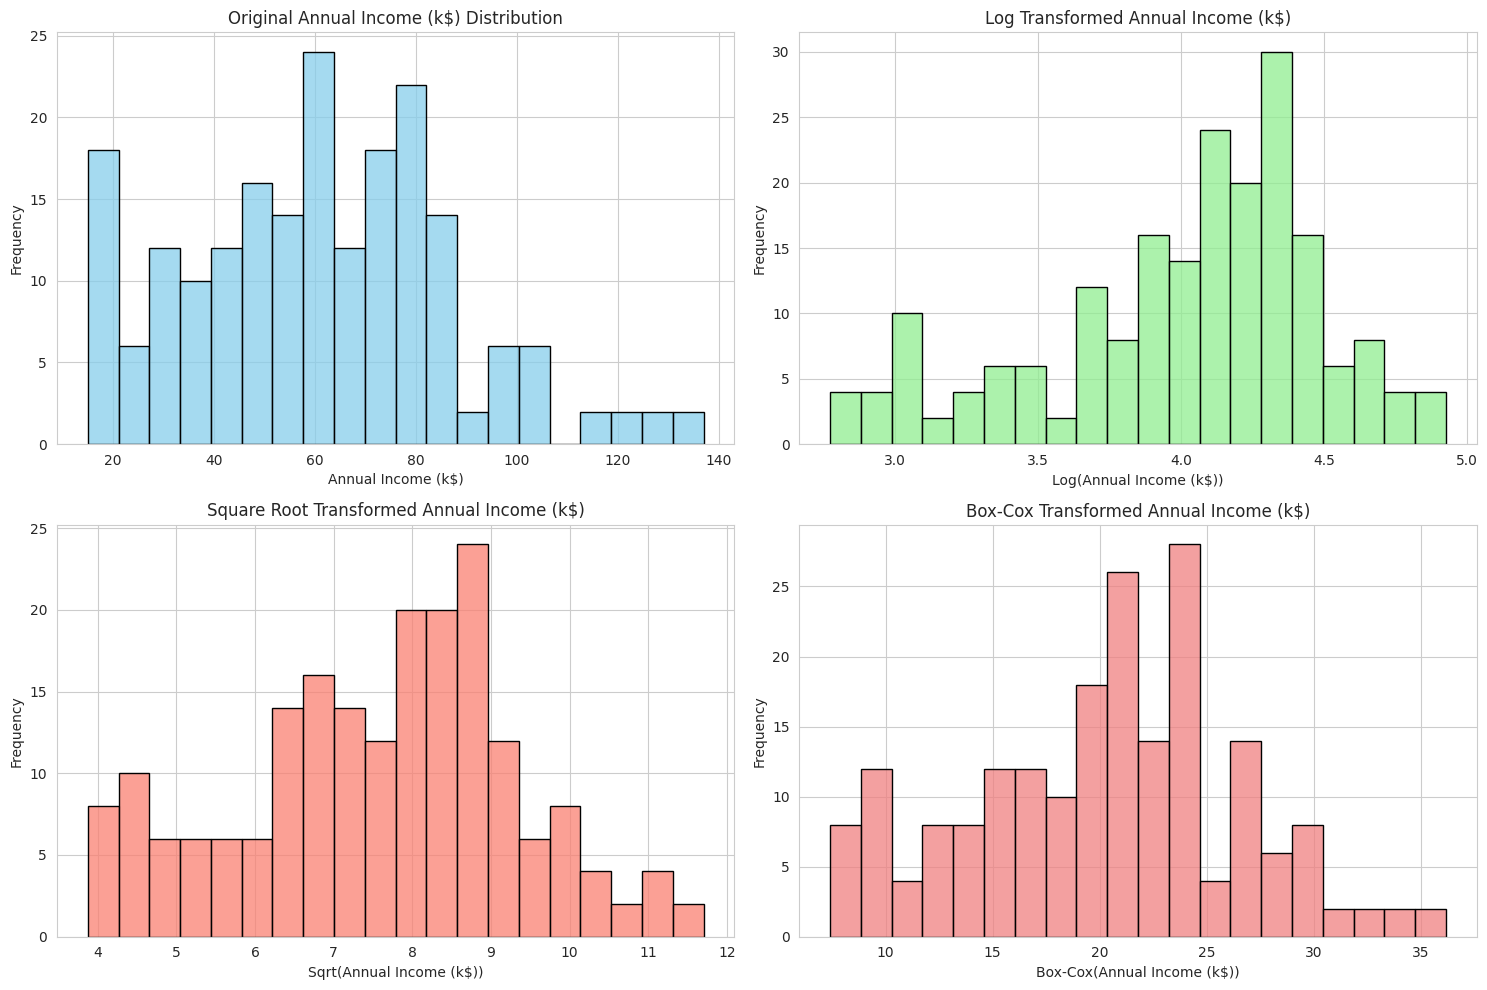

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox


stats = {
    'Original': {'mean': {}, 'std': {}, 'skew': {}},
    'Log': {'mean': {}, 'std': {}, 'skew': {}},
    'SquareRoot': {'mean': {}, 'std': {}, 'skew': {}},
    'BoxCox': {'mean': {}, 'std': {}, 'skew': {}}
}

for col in skewed_cols:
    stats['Original']['mean'][col] = data[col].mean()
    stats['Original']['std'][col] = data[col].std()
    stats['Original']['skew'][col] = data[col].skew()


data_transformed = data.copy()

# Log Transform
for col in skewed_cols:
    data_transformed[f'{col}_log'] = np.log1p(data_transformed[col])
    stats['Log']['mean'][col] = data_transformed[f'{col}_log'].mean()
    stats['Log']['std'][col] = data_transformed[f'{col}_log'].std()
    stats['Log']['skew'][col] = data_transformed[f'{col}_log'].skew()

# Square Root Transform
for col in skewed_cols:
    data_transformed[f'{col}_sqrt'] = np.sqrt(data_transformed[col])
    stats['SquareRoot']['mean'][col] = data_transformed[f'{col}_sqrt'].mean()
    stats['SquareRoot']['std'][col] = data_transformed[f'{col}_sqrt'].std()
    stats['SquareRoot']['skew'][col] = data_transformed[f'{col}_sqrt'].skew()

# Box-Cox Transform
for col in skewed_cols:
    # Box-Cox requires strictly positive data; already satisfied
    transformed, _ = boxcox(data_transformed[col])
    data_transformed[f'{col}_boxcox'] = transformed
    stats['BoxCox']['mean'][col] = data_transformed[f'{col}_boxcox'].mean()
    stats['BoxCox']['std'][col] = data_transformed[f'{col}_boxcox'].std()
    stats['BoxCox']['skew'][col] = data_transformed[f'{col}_boxcox'].skew()


print("\nTransformation Statistics:")
for transform in stats:
    print(f"\n{transform}:")
    for metric in stats[transform]:
        print(f"  {metric}:")
        for col in skewed_cols:
            print(f"    {col}: {stats[transform][metric][col]:.3f}")

# Plotting histograms
for col in skewed_cols:
    plt.figure(figsize=(15, 10))


    plt.subplot(2, 2, 1)
    sns.histplot(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Original {col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    sns.histplot(data_transformed[f'{col}_log'], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Log Transformed {col}')
    plt.xlabel(f'Log({col})')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    sns.histplot(data_transformed[f'{col}_sqrt'], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Square Root Transformed {col}')
    plt.xlabel(f'Sqrt({col})')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.histplot(data_transformed[f'{col}_boxcox'], bins=20, color='lightcoral', edgecolor='black')
    plt.title(f'Box-Cox Transformed {col}')
    plt.xlabel(f'Box-Cox({col})')
    plt.ylabel('Frequency')

    plt.tight_layout()

Customer Dataset - Cluster Centers (Age, Annual Income (k$), Spending Score):
Cluster 0: (46.21, 47.72, 41.80)
Cluster 1: (32.45, 108.18, 82.73)
Cluster 2: (24.69, 29.59, 73.66)
Cluster 3: (40.39, 87.00, 18.63)
Cluster 4: (31.79, 76.09, 77.76)

Customer Dataset - Mean Values per Cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.213483           47.719101               41.797753
1        32.454545          108.181818               82.727273
2        24.689655           29.586207               73.655172
3        40.394737           87.000000               18.631579
4        31.787879           76.090909               77.757576


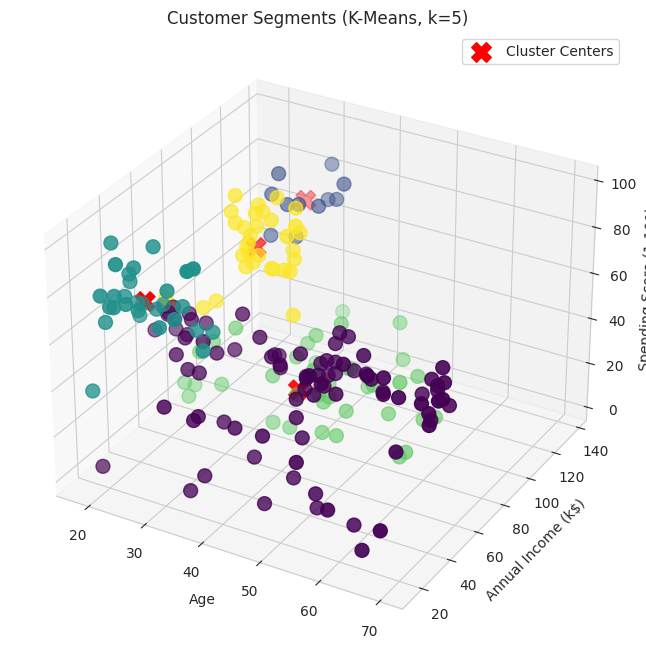

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris



X_customer = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


kmeans_customer = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans_customer.fit_predict(X_customer)


centers_customer = kmeans_customer.cluster_centers_


customer_stats = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


print("Customer Dataset - Cluster Centers (Age, Annual Income (k$), Spending Score):")
for i, center in enumerate(centers_customer):
    print(f"Cluster {i}: ({center[0]:.2f}, {center[1]:.2f}, {center[2]:.2f})")

print("\nCustomer Dataset - Mean Values per Cluster:")
print(customer_stats)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                    c=data['Cluster'], cmap='viridis', s=100)
ax.scatter(centers_customer[:, 0], centers_customer[:, 1], centers_customer[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_title('Customer Segments (K-Means, k=5)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
